# Loan Dataset Processing

### In this notebook, we will be working with the loan dataset to perform various data processing and analysis tasks with a machine learning model incoporated as well.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Read Data


In [2]:
#Load the dataset
df = pd.read_excel("data/Loan_Dataset.xlsx")

#Display the first 5 rows of the dataset
print(df.head())

                                User ID  applications  \
0  00007820-89cb-4c1d-9940-eb270d605a35             1   
1  00012b55-514c-421e-9c76-3300abbc1134             1   
2  000157c1-b6a3-4c86-82c7-9ec1bda3799a             1   
3  00020400-efab-4b10-8812-2a0aaf774841             1   
4  0002f737-0cda-48fb-91ed-533f3d0eab05             1   

                     Reason  Loan_Amount  FICO_score Fico_Score_group  \
0  cover_an_unexpected_cost       100000         669             fair   
1   credit_card_refinancing        70000         594             fair   
2          home_improvement        10000         596             fair   
3          home_improvement       100000         642             fair   
4            major_purchase        30000         642             fair   

  Employment_Status       Employment_Sector  Monthly_Gross_Income  \
0         full_time  consumer_discretionary                  5024   
1         full_time  information_technology                  5764   
2         f

# Data Verification


In [3]:
#Show entries with missing values
print(df.isnull().sum())


User ID                          0
applications                     0
Reason                           0
Loan_Amount                      0
FICO_score                       0
Fico_Score_group                 0
Employment_Status                0
Employment_Sector             6407
Monthly_Gross_Income             0
Monthly_Housing_Payment          0
Ever_Bankrupt_or_Foreclose       0
Lender                           0
Approved                         0
bounty                           0
dtype: int64


In [4]:
#Verify that bounty will always be 150 if lender is C, 250 if lender is A, and 350 if lender is B;  AND if "Approved" is 1
#Bounty will always be 0 if "Approved" is 0
print(df[(df["Lender"]=="C") & (df["Approved"]==1)]["bounty"].value_counts())
print(df[(df["Lender"]=="A") & (df["Approved"]==1)]["bounty"].value_counts())
print(df[(df["Lender"]=="B") & (df["Approved"]==1)]["bounty"].value_counts())
print(df[df["Approved"]==0]["bounty"].value_counts())

print("\n")
#Display the count of all approvals and denials
print(df["Approved"].value_counts())

bounty
150    2985
Name: count, dtype: int64
bounty
250    6031
Name: count, dtype: int64
bounty
350    1960
Name: count, dtype: int64
bounty
0    89024
Name: count, dtype: int64


Approved
0    89024
1    10976
Name: count, dtype: int64


# Data Sanitation


In [5]:
#Replace all missing values in employment_sector with "n/a" and place them in a new df
clean_df = df.fillna("n/a")

#Sanitize data, drop all duplicates and unecessary columns
##User ID is unrelated to other attributes and serves no informative purpose
##applications are all of value 1, meaning it is not informative
##Fico_Score_group is a categorical representation of FICO_Score, so it is not informative
##Bounty will always be 150 for C, 250 for A, and 350 for B so it is not informative
clean_df.drop_duplicates(inplace=True)
clean_df.drop(columns=['User ID', 'applications', 'Fico_Score_group', 'bounty'], inplace=True)

#Display the first 5 rows of the cleaned dataset
print(clean_df.head())

print("\n\n")

#Reverify that there are no missing values and that there are 100,000 entries
print(clean_df.isnull().sum())
print("\n")
print(f"Dataframe Shape: {clean_df.shape}")

                     Reason  Loan_Amount  FICO_score Employment_Status  \
0  cover_an_unexpected_cost       100000         669         full_time   
1   credit_card_refinancing        70000         594         full_time   
2          home_improvement        10000         596         full_time   
3          home_improvement       100000         642         part_time   
4            major_purchase        30000         642         full_time   

        Employment_Sector  Monthly_Gross_Income  Monthly_Housing_Payment  \
0  consumer_discretionary                  5024                      927   
1  information_technology                  5764                     1177   
2  information_technology                  4017                     1487   
3                  energy                  3129                      904   
4                  energy                  4220                     1620   

   Ever_Bankrupt_or_Foreclose Lender  Approved  
0                           0      B         0  


# Exploratory Data Analysis


## Data Column Information:

- Reason - the purpose for requesting a loan (string)
- Loan Amount - the loan value size (int)
- FICO Score - score used to make credit risk decisions (int)
- Employment Status - current employment designation for the customer applying for the loan (string)
- Employment Sector - categorical representation of the industry the customer works in (string)
- Monthly Gross Income - the amount of money the user makes pre-taxes and deductions (int)
- Monthly Housing Payment - how much a month do they pay in housing costs (int)
- Debt to Income Ratio - payments/income
- Ever Bankrupt or Foreclose - has the customer ever had to file for bankruptcy or had a foreclosure on their house (bool)
- Lender - the lending partner (string)
- Approved - did the customer get approved for the loan or not (bool)

### Convert categorical data into numerical data


In [6]:
#Convert categorical data into numerical data using scikit-learn's LabelEncoder and put it in new "num_df"
from sklearn.preprocessing import LabelEncoder
num_df = clean_df.copy()
num_df['Reason'] = LabelEncoder().fit_transform(num_df['Reason'])
num_df['Employment_Status'] = LabelEncoder().fit_transform(num_df['Employment_Status'])
num_df['Employment_Sector'] = LabelEncoder().fit_transform(num_df['Employment_Sector'])
num_df['Lender'] = LabelEncoder().fit_transform(num_df['Lender'])

#Insert a debt to income ratio column
num_df.insert(7, "Debt_to_Income_Ratio", (num_df["Monthly_Housing_Payment"] / num_df["Monthly_Gross_Income"]))

#Display the first 5 rows of the dataset with the categorical data converted to numerical data
print(num_df.head())

   Reason  Loan_Amount  FICO_score  Employment_Status  Employment_Sector  \
0       0       100000         669                  0                  1   
1       1        70000         594                  0                  7   
2       3        10000         596                  0                  7   
3       3       100000         642                  1                  3   
4       4        30000         642                  0                  3   

   Monthly_Gross_Income  Monthly_Housing_Payment  Debt_to_Income_Ratio  \
0                  5024                      927              0.184514   
1                  5764                     1177              0.204198   
2                  4017                     1487              0.370177   
3                  3129                      904              0.288910   
4                  4220                     1620              0.383886   

   Ever_Bankrupt_or_Foreclose  Lender  Approved  
0                           0       1         0 

## Heat Maps


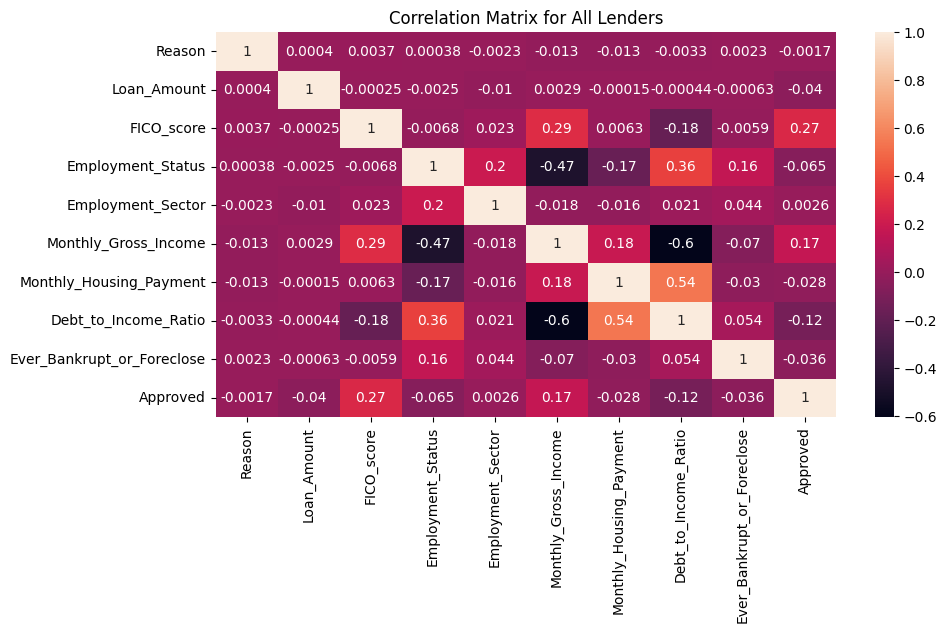

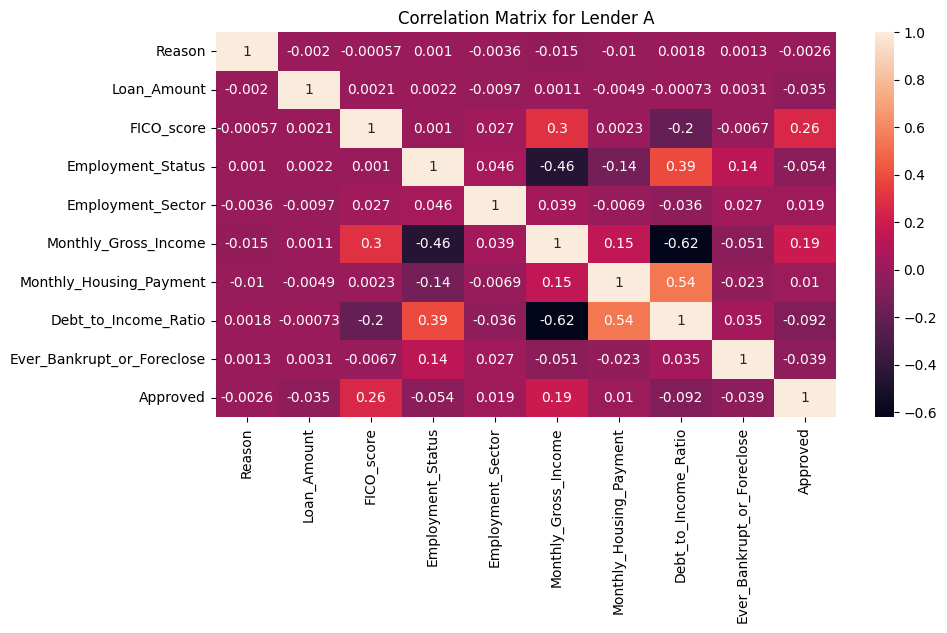

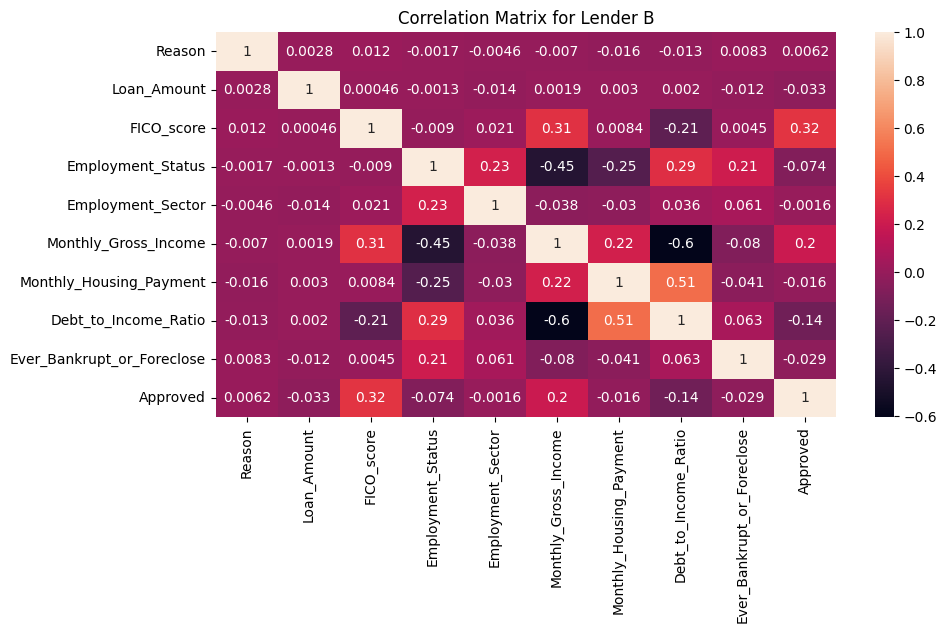

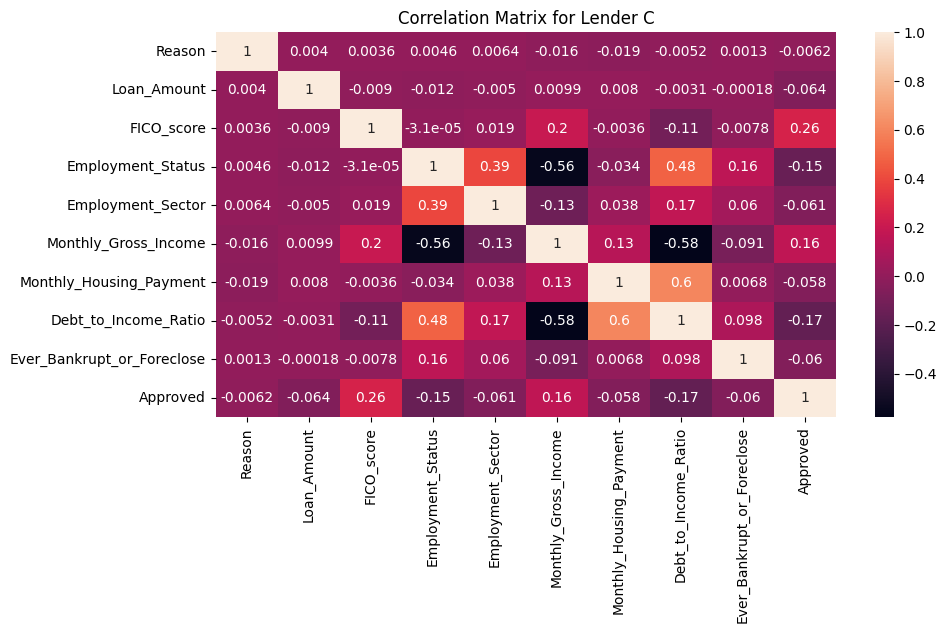

In [7]:
#Create a correlation matrix to see which variables are important in predicting the loan status for all lenders
plt.figure(figsize=(10, 5))
lender_all_df = num_df.drop(columns='Lender')
correlation_matrix = lender_all_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for All Lenders")
plt.show()

#Create a correlation matrix to see which variables are important in predicting the loan status for lender A
plt.figure(figsize=(10, 5))
lender_a_df = num_df[num_df["Lender"]==0].drop(columns='Lender')
correlation_matrix = lender_a_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Lender A")
plt.show()

#Create a correlation matrix to see which variables are important in predicting the loan status for lender B
plt.figure(figsize=(10, 5))
lender_b_df = num_df[num_df["Lender"]==1].drop(columns='Lender')
correlation_matrix = lender_b_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Lender B")
plt.show()

#Create a correlation matrix to see which variables are important in predicting the loan status for lender C
plt.figure(figsize=(10, 5))
lender_c_df = num_df[num_df["Lender"]==2].drop(columns='Lender')
correlation_matrix = lender_c_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Lender C")
plt.show()

The heat maps above indicates that the strongest relationships with loan approvals are observed between "Approved" and "FICO Score", followed by "Approved" and "Monthly Gross Income", followed by a negative correlation between "Approved" and "Debt to Income Ratio". Therefore, we can currently assume that the primary factors influencing loan approval are the applicant's FICO score, monthly income and debt to income ratios. On the other hand, "Reason" and "Employment Sector" falling under 0.1 in correlation across the board are likely not helpful variables to predict approval.


### Statistical Tables


In [8]:
# Descriptive Statistics for FICO Score and Monthly Gross Income vs Approval Status as a table
fico_stats = num_df.groupby('Approved')['FICO_score'].describe()
dti_stats = num_df.groupby('Approved')['Debt_to_Income_Ratio'].describe()

# Convert descriptive statistics to tables
fico_table = tabulate(fico_stats, headers='keys', tablefmt='pretty')
dti_table = tabulate(dti_stats, headers='keys', tablefmt='pretty')

# Print tables
print("Descriptive Statistics for FICO Score vs Approval Status")
print(fico_table)
print("\nDescriptive Statistics for Debt to Income Ratio vs Approval Status")
print(dti_table)
print("\n" * 2)

# Descriptive Statistics for FICO Score and Monthly Gross Income vs Approval Status for Each Lender
fico_stats = num_df.groupby(['Lender', 'Approved'])['FICO_score'].describe()
dti_stats = num_df.groupby(['Lender', 'Approved'])['Debt_to_Income_Ratio'].describe()


# Convert descriptive statistics to tables
fico_table = tabulate(fico_stats, headers='keys', tablefmt='pretty')
dti_table = tabulate(dti_stats, headers='keys', tablefmt='pretty')

# Print tables
print("\nDescriptive Statistics for FICO Score vs Approval Status for Each Lender")
print(fico_table)
print("\nDescriptive Statistics for Debt to Income Ratio vs Approval Status for Each Lender")
print(dti_table)


Descriptive Statistics for FICO Score vs Approval Status
+----------+---------+-------------------+-------------------+-------+-------+-------+-------+-------+
| Approved |  count  |       mean        |        std        |  min  |  25%  |  50%  |  75%  |  max  |
+----------+---------+-------------------+-------------------+-------+-------+-------+-------+-------+
|    0     | 89024.0 | 620.9569217289719 | 86.52098028049927 | 300.0 | 566.0 | 625.0 | 684.0 | 850.0 |
|    1     | 10976.0 | 697.420918367347  | 75.48443599908246 | 353.0 | 658.0 | 701.0 | 742.0 | 850.0 |
+----------+---------+-------------------+-------------------+-------+-------+-------+-------+-------+

Descriptive Statistics for Debt to Income Ratio vs Approval Status
+----------+---------+---------------------+---------------------+----------------------+---------------------+---------------------+--------------------+--------------------+
| Approved |  count  |        mean         |         std         |         min   

The data above shows general trends for some of the variables that had high levels of correlation with approval rates in the heat maps. These trends show us that in general most lenders tend to favor applicants with higher FICO scores and lower debt to income ratios. We can make assumptions here that Lender A likes applicants between the 660-740 FICO score range, Lender B the 690-772 FICO score range, and Lender C the 622-724 FICO score range, given that this is where 50% of their approved applicants fall. The means, however, show us that among all lenders it is potentially Lender C that is most comfortable taking applicants with lower FICO scores.


### Statistical Plots


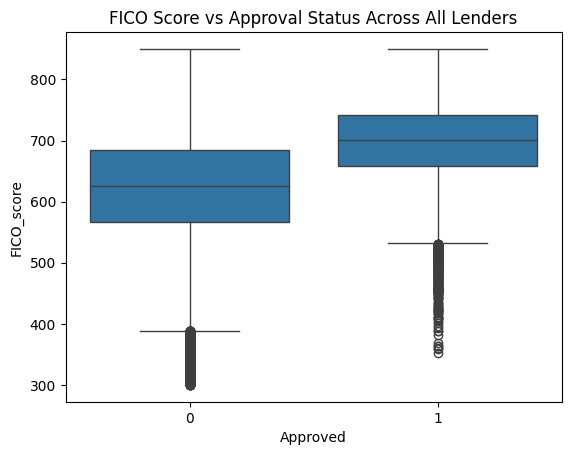

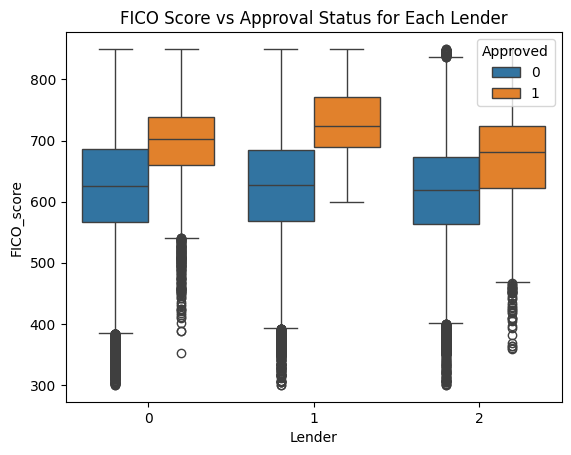

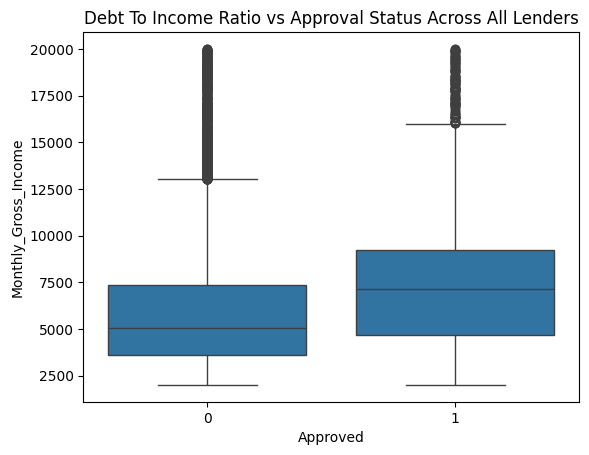

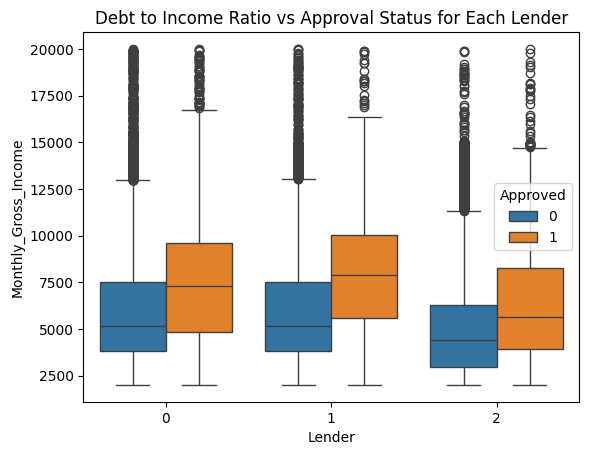

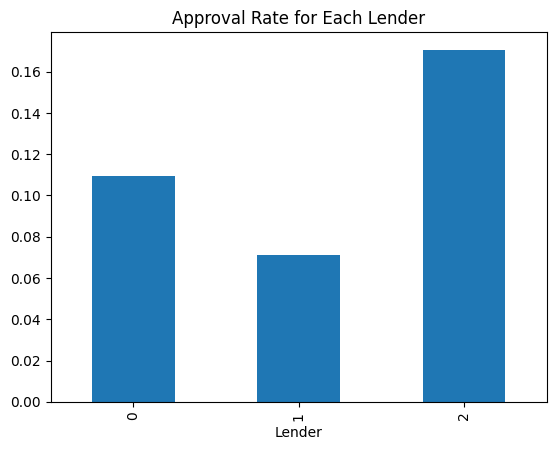

/var/folders/tk/2x_nv74n6xlc0twrqkjx_7j00000gn/T/ipykernel_59165/3149258769.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate = plot_df.groupby(['Lender', 'FICO_Ranges'])['Approved'].mean()


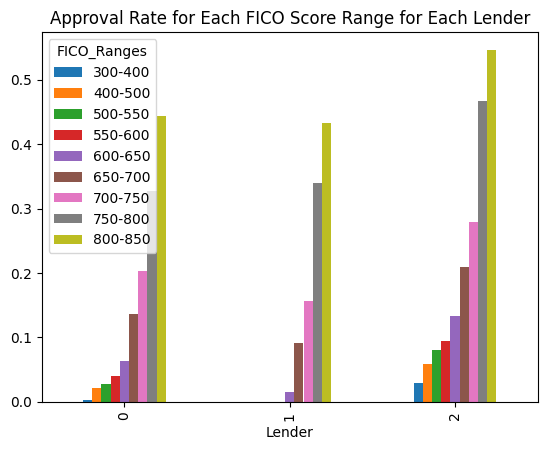

In [9]:

# Relationship Between approval and FICO score 
sns.boxplot(x='Approved', y='FICO_score', data=num_df)
plt.title("FICO Score vs Approval Status Across All Lenders")
plt.show()

sns.boxplot(x='Lender', y='FICO_score', data=num_df, hue='Approved')
plt.title("FICO Score vs Approval Status for Each Lender")
plt.show()

# Relationship Between approval and monthly gross income
sns.boxplot(x='Approved', y='Monthly_Gross_Income', data=num_df)
plt.title("Debt To Income Ratio vs Approval Status Across All Lenders")
plt.show()

sns.boxplot(x='Lender', y='Monthly_Gross_Income', data=num_df, hue='Approved')
plt.title("Debt to Income Ratio vs Approval Status for Each Lender")
plt.show()

# Bar graphs of approval average for each lender
approval_rate = num_df.groupby('Lender')['Approved'].mean()
approval_rate.plot(kind='bar')
plt.title("Approval Rate for Each Lender")
plt.show()

#Bar graphs of approval for each FICO score range for each lender
plot_df = num_df.copy()
fico_bins = [300, 400, 500, 550, 600, 650, 700, 750, 800, 850]
fico_labels = ['300-400', '400-500', '500-550', '550-600', '600-650', '650-700', '700-750', '750-800', '800-850']
plot_df['FICO_Ranges'] = pd.cut(plot_df['FICO_score'], bins=fico_bins, labels=fico_labels)
approval_rate = plot_df.groupby(['Lender', 'FICO_Ranges'])['Approved'].mean()
approval_rate.unstack().plot(kind='bar')
plt.title("Approval Rate for Each FICO Score Range for Each Lender")
plt.show()

This is some visual representations of the data across the FICO score and DTI variables. We can visually see some of the conclusions we made with the table data but also confirm here in the last graphics that lender C has both the highest rates of approval and the widest ranges of approval regarding FICO scores.


# Machine Learning Models Analysis


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Random Tree Variable Importance


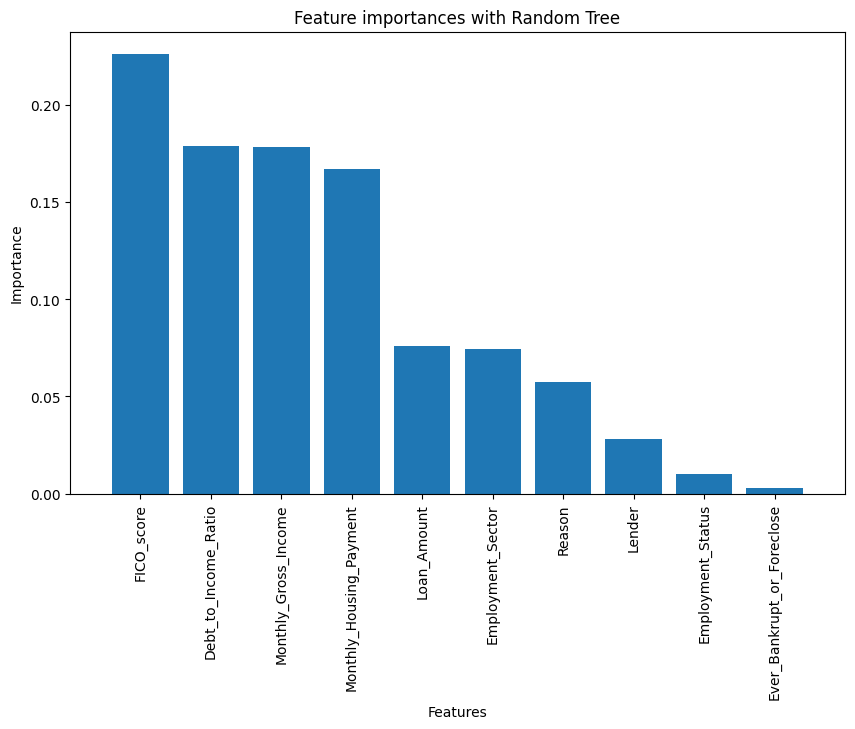

In [11]:
# Split the data into features/input (X) and target/output (y)
X = num_df.drop(columns=['Approved'])
y = num_df['Approved']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances with Random Tree")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


The chart above displays the variable importance as determined by the random forest model. Variable importance represents the contribution of each feature to the model's predictive performance. Features with higher importance values are considered more influential in predicting the target variable. Seeing this information we can use the knowledge we've gathered to get rid of some variables to better our model.


## Gradient Boosting Variable Importance


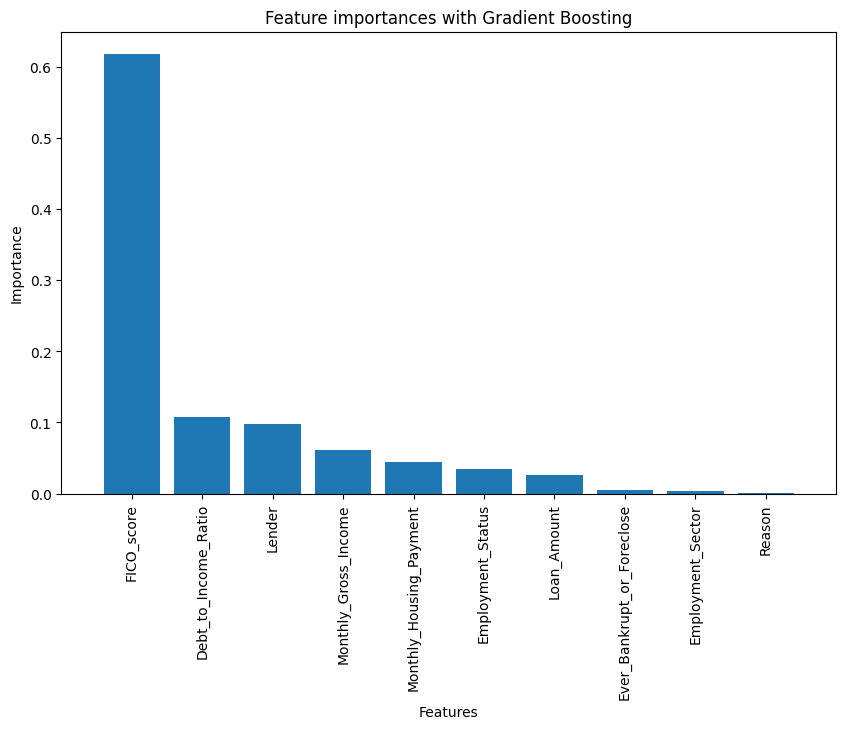

In [12]:
X = num_df.drop(columns=['Approved'])
y = num_df['Approved']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Get feature importances
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances with Gradient Boosting")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

The chart above displays the variable importance as determined by the gradient boosting model. Variable importance represents the contribution of each feature to the model's predictive performance. Features with higher importance values are considered more influential in predicting the target variable. Seeing this information we can use the knowledge we've gathered to get rid of some variables to better our model.


## Prediction Models and Their Performance


In [13]:
ml_df = num_df.copy()

#Remove the least important features
ml_df.drop(columns='Reason', inplace=True)
ml_df.drop(columns='Employment_Sector', inplace=True)
ml_df.drop(columns='Ever_Bankrupt_or_Foreclose', inplace=True)

# Split the data into features/input (X) and target/output (y)
X = ml_df.drop(columns=['Approved'])
y = ml_df['Approved']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

#Logistic Regression
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\n")

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\n")

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\n")

Logistic Regression Accuracy: 0.8907
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     17800
           1       0.53      0.07      0.12      2200

    accuracy                           0.89     20000
   macro avg       0.71      0.53      0.53     20000
weighted avg       0.86      0.89      0.85     20000

[[17671   129]
 [ 2057   143]]


Random Forest Accuracy: 0.89245
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     17800
           1       0.54      0.15      0.23      2200

    accuracy                           0.89     20000
   macro avg       0.72      0.57      0.59     20000
weighted avg       0.86      0.89      0.86     20000

[[17526   274]
 [ 1877   323]]


Gradient Boosting Accuracy: 0.89355
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     17800
           1       0.60      0.09      0.16      2200

    accurac

Given the information above we can see that each model performs with a relatively good accuracy. However, its performance decreases when correctly identifying if a person is to be approved by a lender. Since random forest performed best in the approval category with the highest f1-score balancing percision and recall we will choose this model since our focus is loan approval.


## Random Forest Model for all 3 Lenders


In [14]:
#Create a random forest model for lender A
lender_a_df = ml_df[ml_df["Lender"]==0].drop(columns='Lender')
X_a = lender_a_df.drop(columns=['Approved'])
y_a = lender_a_df['Approved']
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size=0.2, random_state=42)
random_forest_a = RandomForestClassifier()
random_forest_a.fit(X_a_train, y_a_train)
y_a_pred = random_forest_a.predict(X_a_test)
print(f"Lender A Random Forest Accuracy: {accuracy_score(y_a_test, y_a_pred)}")
print(classification_report(y_a_test, y_a_pred))
print(confusion_matrix(y_a_test, y_a_pred))
print("\n")

#Create a random forest model for lender B
lender_b_df = ml_df[ml_df["Lender"]==1].drop(columns='Lender')
X_b = lender_b_df.drop(columns=['Approved'])
y_b = lender_b_df['Approved']
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.2, random_state=42)
random_forest_b = RandomForestClassifier()
random_forest_b.fit(X_b_train, y_b_train)
y_b_pred = random_forest_b.predict(X_b_test)
print(f"Lender B Random Forest Accuracy: {accuracy_score(y_b_test, y_b_pred)}")
print(classification_report(y_b_test, y_b_pred))
print(confusion_matrix(y_b_test, y_b_pred))
print("\n")

#Create a random forest model for lender C
lender_c_df = ml_df[ml_df["Lender"]==2].drop(columns='Lender')
X_c = lender_c_df.drop(columns=['Approved'])
y_c = lender_c_df['Approved']
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
random_forest_c = RandomForestClassifier()
random_forest_c.fit(X_c_train, y_c_train)
y_c_pred = random_forest_c.predict(X_c_test)
print(f"Lender C Random Forest Accuracy: {accuracy_score(y_c_test, y_c_pred)}")
print(classification_report(y_c_test, y_c_pred))
print(confusion_matrix(y_c_test, y_c_pred))

Lender A Random Forest Accuracy: 0.8966363636363637
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      9803
           1       0.59      0.17      0.27      1197

    accuracy                           0.90     11000
   macro avg       0.75      0.58      0.60     11000
weighted avg       0.87      0.90      0.87     11000

[[9658  145]
 [ 992  205]]


Lender B Random Forest Accuracy: 0.9236363636363636
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5096
           1       0.43      0.11      0.18       404

    accuracy                           0.92      5500
   macro avg       0.68      0.55      0.57      5500
weighted avg       0.90      0.92      0.90      5500

[[5034   62]
 [ 358   46]]


Lender C Random Forest Accuracy: 0.8294285714285714
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2914
           1       0.47

## Save Three Models


In [15]:
import os
import joblib

path = "ml_models/"

# Check if the files already exist
if not os.path.isfile(path + 'random_forest_a.joblib'):
    joblib.dump(random_forest_a, path + 'random_forest_a.joblib')
    print("Model 'random_forest_a' saved.")
else:
    print("Model 'random_forest_a' already exists.")

if not os.path.isfile(path + 'random_forest_b.joblib'):
    joblib.dump(random_forest_b, path + 'random_forest_b.joblib')
    print("Model 'random_forest_b' saved.")
else:
    print("Model 'random_forest_b' already exists.")

if not os.path.isfile(path + 'random_forest_c.joblib'):
    joblib.dump(random_forest_c, path + 'random_forest_c.joblib')
    print("Model 'random_forest_c' saved.")
else:
    print("Model 'random_forest_c' already exists.")

Model 'random_forest_a' already exists.
Model 'random_forest_b' already exists.
Model 'random_forest_c' already exists.
